In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

import sys
from itertools import combinations
from datetime import datetime
import random
import warnings

warnings.filterwarnings("ignore")

print("Python Version : ", sys.version)
print("Cartopy Version : ", cartopy.__version__)

%matplotlib inline

Python Version :  3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]
Cartopy Version :  0.19.0.post1


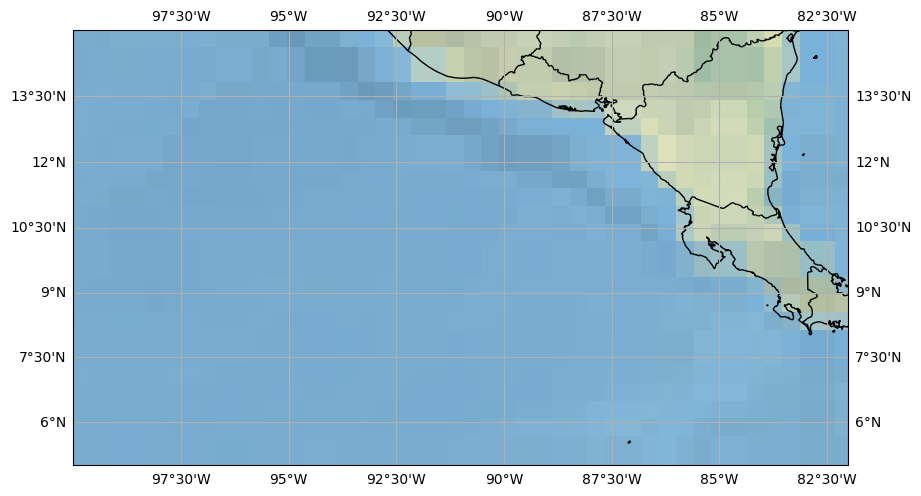

In [2]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

lat1, lon1, lat2, lon2 = -100, -82, 5,15
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())
#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

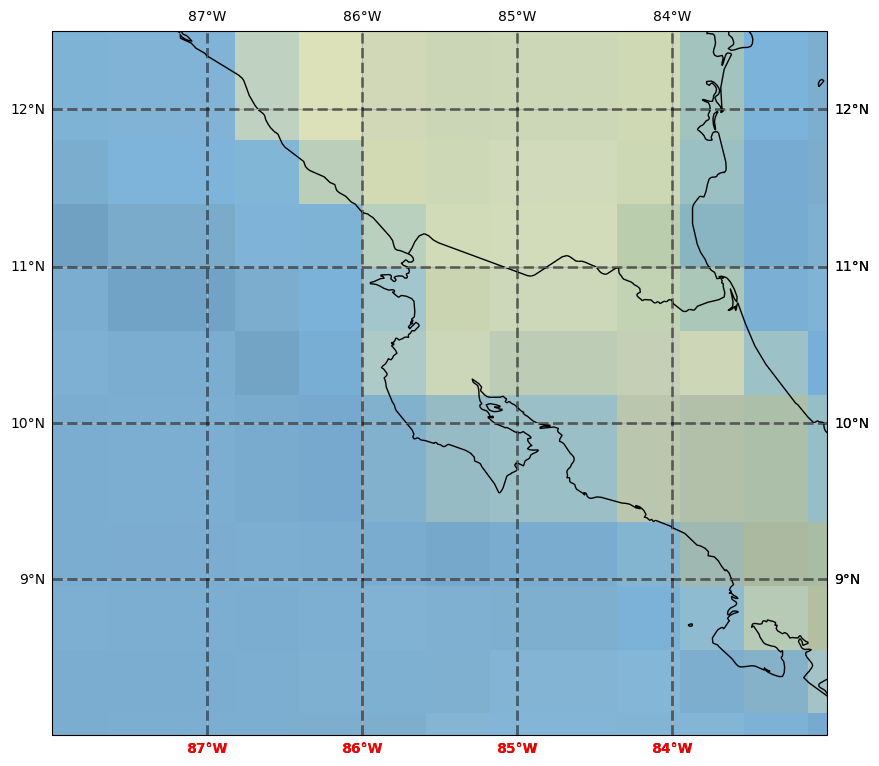

In [3]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

lat1, lon1, lat2, lon2 = -88, -83, 8,12.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())
#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([120, 140, 160, 180, -160, -140, -120])
#gl.ylocator = mticker.FixedLocator([0, 20, 40, 60])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.show()

In [4]:
#Estaciones
lats = [11.199889,10.919944,10.833333,10.841111,11.054361,10.958833]
lons = [-85.618722,-85.610694,-85.616667, -85.619444, -85.633417, -85.495831]

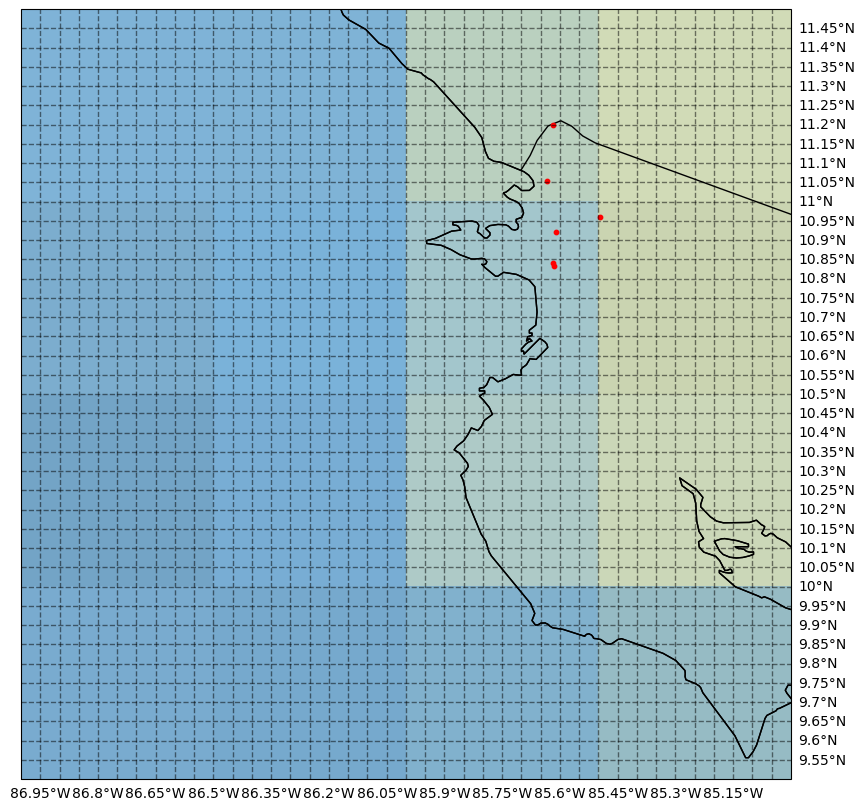

In [5]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='10m')


lat1, lon1, lat2, lon2 = -87, -85, 9.5,11.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'} 

plt.scatter(
    x=lons,
    y=lats,
#    s = 2*np.ones(6)**2,
    color="red",
    s=10,
    alpha=1,
    transform=ccrs.PlateCarree()
)

#tile = cimgt.StamenTerrain()
#ax.add_image(tile,5)

#plt.text(ny_lon - 3, ny_lat - 12, 'New York',
#         horizontalalignment='right',
#         transform=ccrs.Geodetic())


#gl.xlocator = mticker.FixedLocator([120, 140, 160, 180, -160, -140, -120])
#gl.ylocator = mticker.FixedLocator([0, 20, 40, 60])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

#geodetic_transform = ccrs.Mercator()._as_mpl_transform(ax)
#text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

#ax.text(11, 2, 'Eyjafjallajökull',
#        verticalalignment='center', horizontalalignment='right',
#        transform=text_transform,
#        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

plt.show()

In [6]:
import xarray as xr
import numpy as np

In [7]:
geof = '/glade/scratch/pmora/ocean_geometry.nc'

DSg = xr.open_mfdataset(
    geof,
    compat="override",
    data_vars="minimal",
    coords="minimal",
    parallel=True,
    concat_dim="time",
    combine="nested",
)
DSg

<xarray.Dataset>
Dimensions:  (lath: 900, lonh: 1000, latq: 901, lonq: 1001)
Coordinates:
  * lath     (lath) float64 -14.97 -14.93 -14.88 -14.82 ... 29.88 29.92 29.98
  * lonh     (lonh) float64 235.0 235.1 235.1 235.2 ... 284.8 284.9 284.9 285.0
  * latq     (latq) float64 -15.0 -14.95 -14.9 -14.85 ... 29.85 29.9 29.95 30.0
  * lonq     (lonq) float64 235.0 235.1 235.1 235.2 ... 284.9 284.9 284.9 285.0
Data variables: (12/19)
    geolatb  (latq, lonq) float64 dask.array<chunksize=(901, 1001), meta=np.ndarray>
    geolonb  (latq, lonq) float64 dask.array<chunksize=(901, 1001), meta=np.ndarray>
    geolat   (lath, lonh) float64 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    geolon   (lath, lonh) float64 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    D        (lath, lonh) float64 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    f        (latq, lonq) float64 dask.array<chunksize=(901, 1001), meta=np.ndarray>
    ...       ...
    dyBu     (latq, lonq) float64 dask.array<chunksize=(901, 1001), meta=np.ndarray>
    Ah       (lath, lonh) float64 dask.array<chunksize=(900, 1000), meta=np.ndarray>
    Aq       (latq, lonq) float64 dask.array<chunksize=(901, 1001), meta=np.ndarray>
    dxCvo    (latq, lonh) float64 dask.array<chunksize=(901, 1000), meta=np.ndarray>
    dyCuo    (lath, lonq) float64 dask.array<chunksize=(900, 1001), meta=np.ndarray>
    wet      (lath, lonh) float64 dask.array<chunksize=(900, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [8]:
DS = DSg.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5))

In [9]:
ocn = 1 -DS.wet
#ocn.plot()
ocn1 = (ocn + ocn.shift(lath=1) + ocn.shift(lonh=1))
ocn2 = (ocn + ocn.shift(lath=-1) + ocn.shift(lonh=1))

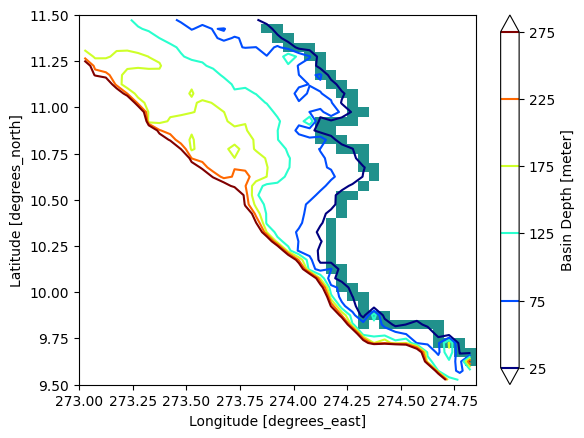

In [10]:
m2 = xr.where((ocn2 < 2.5) & (ocn2 > 0.5), xr.ones_like(ocn2),np.nan)
m2.plot(add_colorbar=False)
DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(25,300,50), cmap='jet')

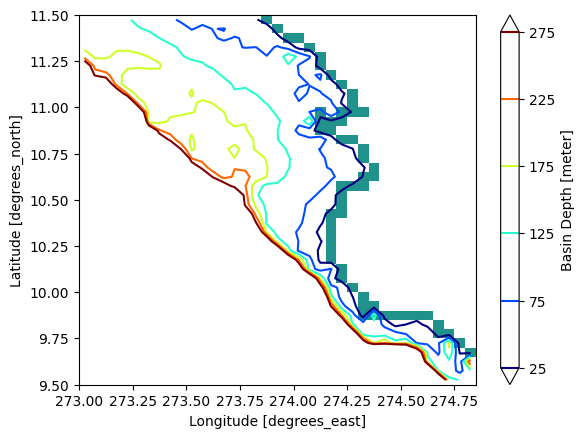

In [11]:
m1 = xr.where((ocn1 < 2.5) & (ocn1 > 0.5), xr.ones_like(ocn1),np.nan)
m1.plot(add_colorbar=False)
DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(25,300,50), cmap='jet')

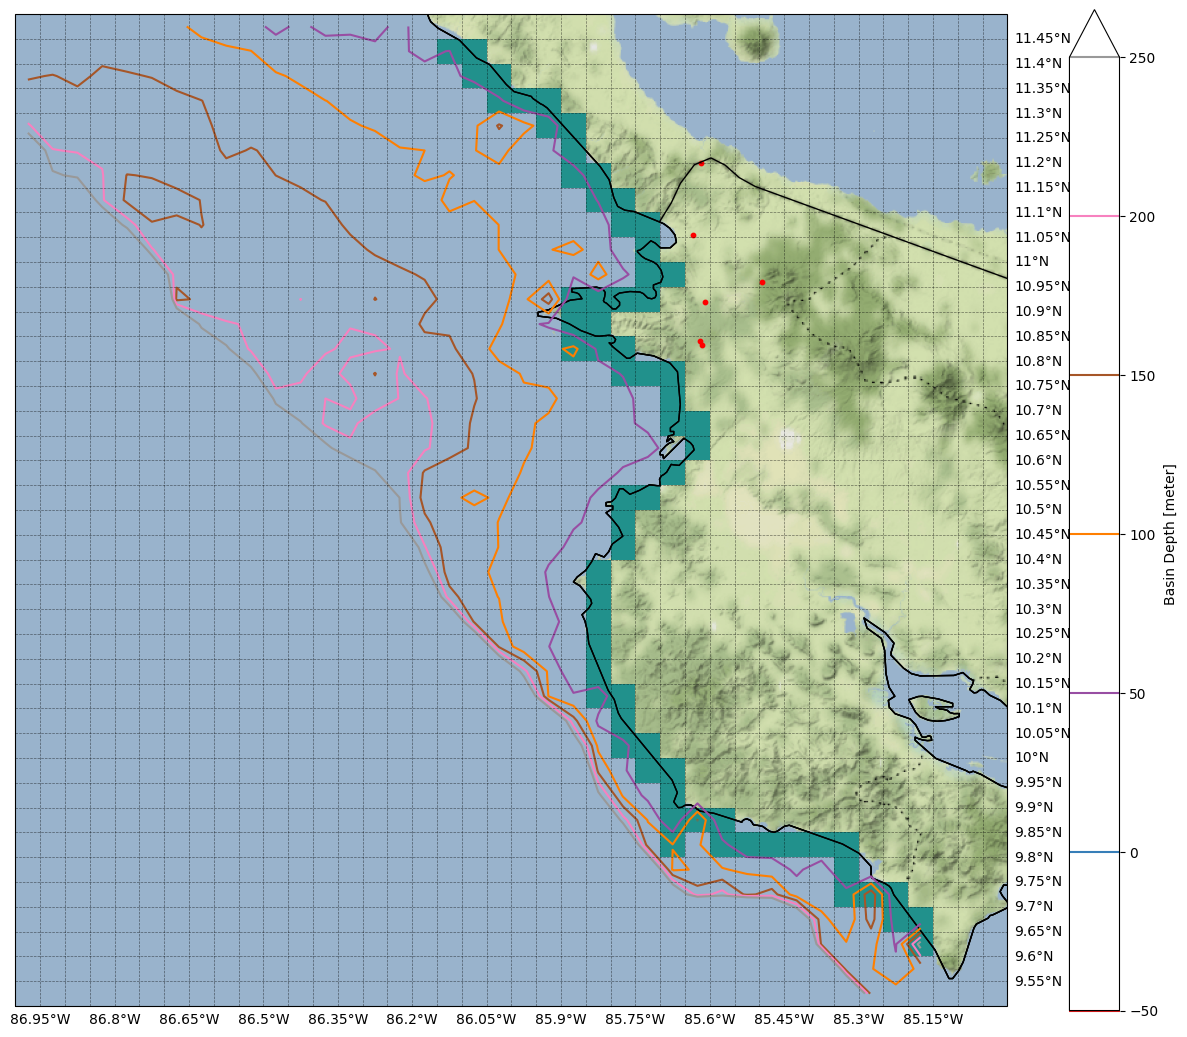

In [12]:
import cartopy.io.img_tiles as cimgt

fig = plt.figure(figsize=(16,13))


ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

tile = cimgt.StamenTerrain()
ax.add_image(tile,9)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.coastlines(resolution='10m')
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)


lat1, lon1, lat2, lon2 = -87, -85, 9.5,11.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'} 

plt.scatter(
    x=lons,
    y=lats,
#    s = 2*np.ones(6)**2,
    color="red",
    s=10,
    alpha=1,
    transform=ccrs.PlateCarree()
)
m2 = xr.where((ocn2 < 2.5) & (ocn2 > 0.5), xr.ones_like(ocn1),np.nan)
m2.plot(add_colorbar=False)
DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(-50,300,50), cmap='Set1')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='10m')


plt.show()

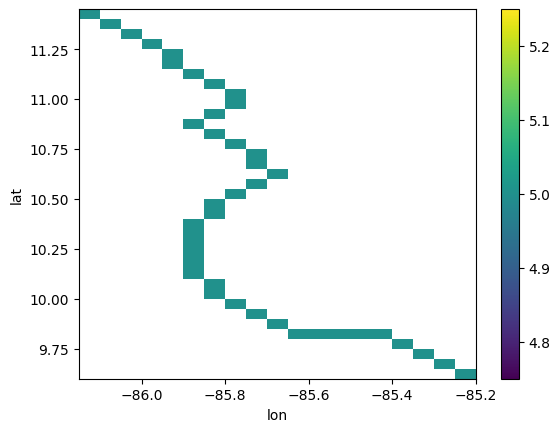

In [13]:
mask = np.ones(41)
lat = [9.625,9.675,9.725,9.775,9.825,9.825,9.825,9.825,9.825,9.875,9.925,9.975,10.025,10.075,10.125,10.175,10.225,10.275,10.325,10.375,10.425,10.475,10.525,10.575,10.625,10.675,10.725,10.775,10.825,10.875,10.925,10.975,11.025,11.075,11.125,11.175,11.225,11.275,11.325,11.375,11.4254]
lon = [-85.225,-85.275,-85.325,-85.375,-85.425,-85.475,-85.525,-85.575,-85.625,-85.675,-85.725,-85.775,-85.825,-85.825,-85.875,-85.875,-85.875,-85.875,-85.875,-85.875,-85.825,-85.825,-85.775,-85.725,-85.675,-85.725,-85.725,-85.775,-85.825,-85.875,-85.825,-85.775,-85.775,-85.825,-85.875,-85.925,-85.925,-85.975,-86.025,-86.075,-86.125]
df = pd.DataFrame({"mask":mask, "lat":lat, "lon":lon})
#df
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)

mask = xr.DataArray(data=df_pv)*5
mask.plot()



In [20]:
mask3 = np.ones(51)
lat3 = [9.625,9.675,9.725,9.725,9.775,9.825,9.825,9.825,9.825,9.825,9.825,9.825,9.825,9.875,9.925,9.975,10.025,10.075,10.125,10.175,10.225,10.275,10.325,10.375,10.425,10.475,10.525,10.575,10.575,10.625,10.675,10.725,10.775,10.775,10.825,10.825,10.875,10.925,10.975,10.975,10.975,10.975,11.025,11.075,11.125,11.175,11.225,11.275,11.325,11.325,11.375]
lon3 = [-85.225,-85.275,-85.325,-85.375,-85.425,-85.425,-85.475,-85.525,-85.575,-85.625,-85.675,-85.725,-85.775,-85.775,-85.775,-85.775,-85.825,-85.875,-85.875,-85.925,-85.925,-85.925,-85.925,-85.925,-85.875,-85.875,-85.875,-85.825,-85.775,-85.725,-85.725,-85.775,-85.775,-85.825,-85.875,-85.925,-85.975,-85.975,-85.925,-85.875,-85.825,-85.775,-85.825,-85.825,-85.875,-85.925,-85.975,-85.975,-86.025,-86.075,-86.125]
df = pd.DataFrame({"mask":mask3, "lat":lat3, "lon":lon2})
df

,mask,lat,lon
0,1.0,9.625,274.775
1,1.0,9.675,274.725
2,1.0,9.725,274.675
3,1.0,9.725,274.625
4,1.0,9.775,274.575
5,1.0,9.825,274.575
6,1.0,9.825,274.525
7,1.0,9.825,274.475
8,1.0,9.825,274.425
9,1.0,9.825,274.375


In [21]:
lon3 = np.array(lon3)
lon2 = 360+lon3
len(lon2)

51

In [22]:
df_pv3 = df.pivot(index="lat", columns="lon")
df_pv3= df_pv3.droplevel(0, axis=1)
df_pv3

lon,273.875,273.925,273.975,274.025,274.075,274.125,274.175,274.225,274.275,274.325,274.375,274.425,274.475,274.525,274.575,274.625,274.675,274.725,274.775
lat,,,,,,,,,,,,,,,,,,,
9.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9.675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
9.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
9.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.025,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mask3 = xr.DataArray(data=df_pv3)
mask3

<xarray.DataArray (lat: 36, lon: 19)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1.,  1., nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
...
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 9.625 9.675 9.725 9.775 ... 11.22 11.28 11.32 11.38
  * lon      (lon) float64 273.9 273.9 274.0 274.0 ... 274.6 274.7 274.7 274.8

In [121]:
#mask3.coords['lon'] = (360+mask3.coords['lon'])
#mask3

<xarray.DataArray (lat: 36, lon: 19)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1.,  1., nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
...
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 9.625 9.675 9.725 9.775 ... 11.22 11.28 11.32 11.38
  * lon      (lon) float64 273.9 273.9 274.0 274.0 ... 274.6 274.7 274.7 274.8

In [24]:
mask3.lat.attrs['long_name'] = 'Latitude'
mask3.lat.attrs['units'] = 'degrees_north'
mask3.lat.attrs['cartesian_axis'] = 'Y'

mask3.lon.attrs['long_name'] = 'Longitude'
mask3.lon.attrs['units'] = 'degrees_east'
mask3.lon.attrs['cartesian_axis'] = 'X'

In [151]:
mask3

<xarray.DataArray (lat: 36, lon: 19)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan,  1., nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan,  1.,  1., nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
...
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [nan,  1.,  1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 9.625 9.675 9.725 9.775 ... 11.22 11.28 11.32 11.38
  * lon      (lon) float64 273.9 273.9 274.0 274.0 ... 274.6 274.7 274.7 274.8

In [152]:
mask3.to_netcdf('/glade/scratch/pmora/mask3.nc')

In [21]:
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
#df_pv

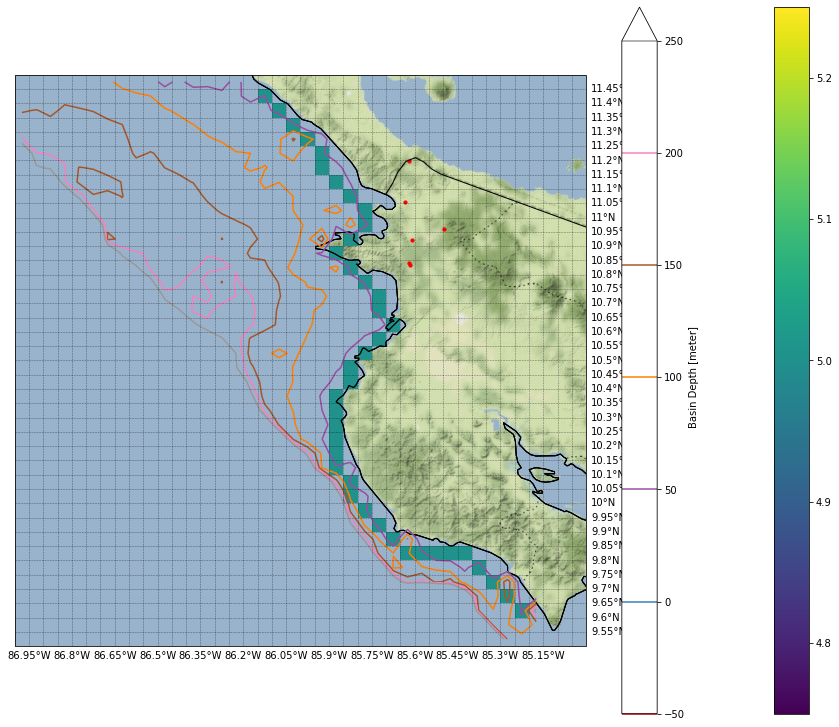

In [13]:
import cartopy.io.img_tiles as cimgt

fig = plt.figure(figsize=(16,13))


ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

tile = cimgt.StamenTerrain()
ax.add_image(tile,9)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.coastlines(resolution='10m')
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)


lat1, lon1, lat2, lon2 = -87, -85, 9.5,11.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'} 

plt.scatter(
    x=lons,
    y=lats,
#    s = 2*np.ones(6)**2,
    color="red",
    s=10,
    alpha=1,
    transform=ccrs.PlateCarree()
)

mask.plot()
DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(-50,300,50), cmap='Set1')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='10m')

plt.show()

In [ ]:
mask2 = np.ones(50)
lat2 = [9.625,9.675,9.725,9.725,9.775,9.825,9.825,9.775,9.825,9.825,9.825,9.825,9.875,9.925,9.975,10.025,10.075,10.125,10.125,10.175,10.225,10.275,10.325,10.375,10.425,10.475,10.525,10.575,10.625,10.675,10.725,10.775,10.775,10.825,10.825,10.875,10.925,10.975,10.975,10.975,11.025,11.075,11.125,11.175,11.225,11.275,11.275,11.325,11.375,11.425]
lon2 = [-85.175,-85.225,-85.275,-85.325,-85.375,-85.425,-85.475,-85.525,-85.575,-85.625,-85.675,-85.725,-85.725,-85.725,-85.725,-85.775,-85.825,-85.825,-85.875,-85.925,-85.925,-85.925,-85.925,-85.925,-85.875,-85.825,-85.825,-85.775,-85.725,-85.725,-85.725,-85.725,-85.775,-85.825,-85.875,-85.925,-85.925,-85.875,-85.825,-85.775,-85.775,-85.775,-85.825,-85.875,-85.925,-85.925,-85.975,-86.025,-86.075,-86.125]
df = pd.DataFrame({"mask":mask2, "lat":lat2, "lon":lon2})

df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
#df_pv

mask2 = xr.DataArray(data=df_pv)*5

mask2

#df

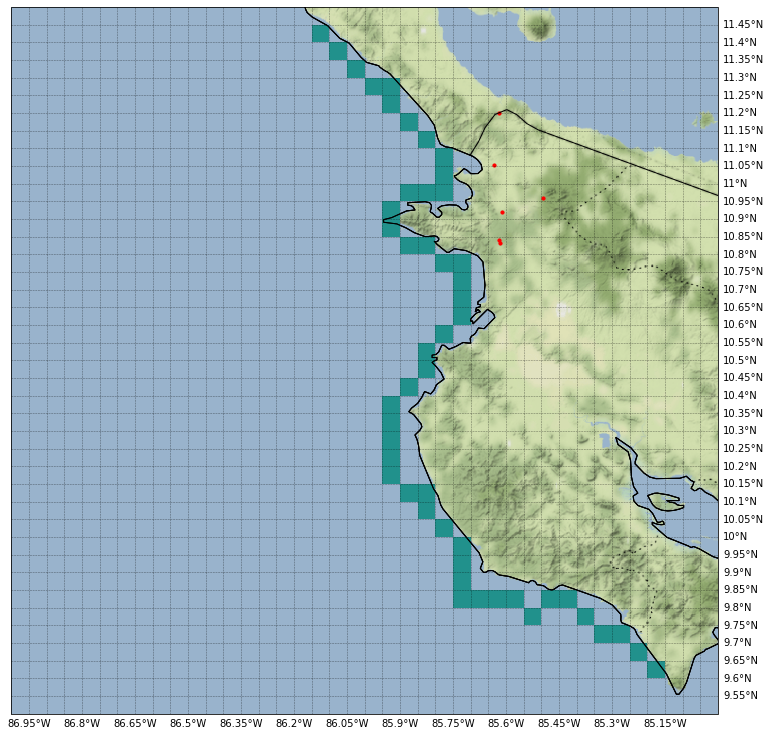

In [24]:
import cartopy.io.img_tiles as cimgt

fig = plt.figure(figsize=(16,13))


ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

tile = cimgt.StamenTerrain()
ax.add_image(tile,9)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.coastlines(resolution='10m')
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)


lat1, lon1, lat2, lon2 = -87, -85, 9.5,11.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'} 

plt.scatter(
    x=lons,
    y=lats,
#    s = 2*np.ones(6)**2,
    color="red",
    s=10,
    alpha=1,
    transform=ccrs.PlateCarree()
)

mask2.plot(add_colorbar=False)
#DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(-50,300,50), cmap='Set1')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='10m')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

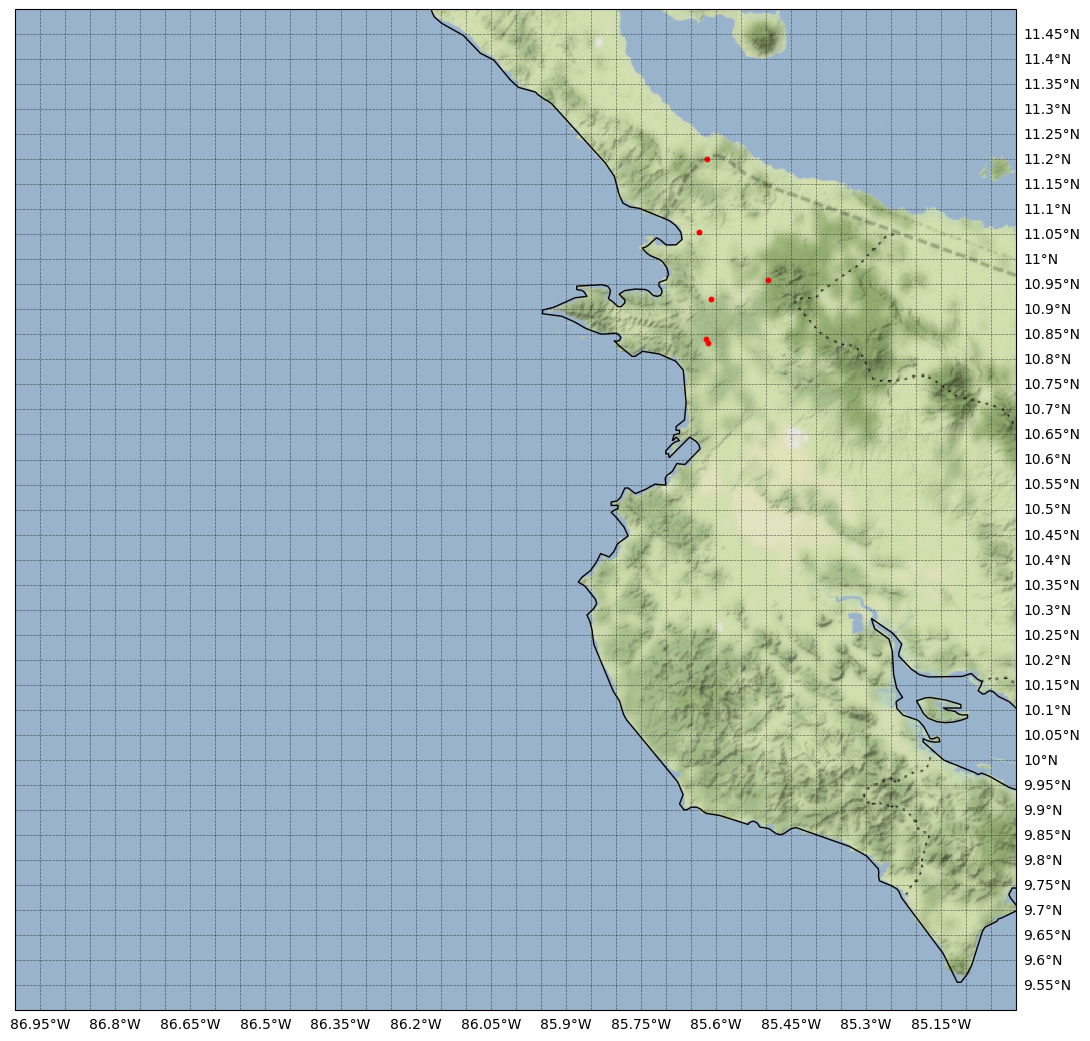

In [15]:
import cartopy.io.img_tiles as cimgt

fig = plt.figure(figsize=(16,13))


ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

tile = cimgt.StamenTerrain()
ax.add_image(tile,9)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.BORDERS, linestyle='--')
#ax.coastlines(resolution='10m')
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)


lat1, lon1, lat2, lon2 = -87, -85, 9.5,11.5
ax.set_extent([lat1, lon1, lat2, lon2], crs=ccrs.PlateCarree())

#ax.set_xlim(65, 95)
#ax.set_ylim(5, 40)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#gl.xformatter = LongitudeFormatter()
#gl.yformatter = LatitudeFormatter()
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'} 

plt.scatter(
    x=lons,
    y=lats,
#    s = 2*np.ones(6)**2,
    color="red",
    s=10,
    alpha=1,
    transform=ccrs.PlateCarree()
)

mask3.plot(add_colorbar=False, transform=ccrs.PlateCarree())
DSg.D.sel(lonh=slice(273,274.85),lath=slice(9.5,11.5)).plot.contour(add_colorbar=True, levels = np.arange(0,350,50), cmap='jet')
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='10m')

plt.show()